In [1]:
import numpy as np
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt


In [3]:
"""
Need a measurement of matching
"""

#Main path

KITTI360Path="/media/ren/EXTERNAL_USB/KITTI360_DATASET/"

print(KITTI360Path)
# NoneType=type(None)
def ORB(img):
    """
     ORB detector
    """
    orb = cv2.ORB_create(50000)
    """find keypoint, and calculate descriptor"""
    kp, des = orb.detectAndCompute(img, None)

    # plot keypoints
    # img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

 
    # plt.figure(figsize=(10, 8), dpi=100)
    # plt.imshow(img2[:, :, ::-1])
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    return kp, des



def SIFT(img):
    """
     SIFT detector
    """
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # SIFT keypoint detector
    # sift instantiation 
    sift = cv2.xfeatures2d.SIFT_create()

    # sift detect and compute 
    kp, des = sift.detectAndCompute(img, None)
    
    # kp: information of keypoint, including position, scale, direction
    # des: keypoint descriptor, corresponds to a feature vector of 128 gradient information

    # image show
    # cv2.drawKeypoints(img, kp, img, (0, 255, 0))

    
    # plt.figure(figsize=(10, 8), dpi=100)
    # plt.imshow(img[:, :, ::-1])
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    return kp, des


def SURF(img):
    surf = cv2.xfeatures2d.SURF_create()
    kp, des = surf.detectAndCompute(img, None)
    # cv2.drawKeypoints(img, kp, img, (0, 255, 0))

    
    # plt.figure(figsize=(10, 8), dpi=100)
    # plt.imshow(img[:, :, ::-1])
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    return kp, des


/media/ren/EXTERNAL_USB/KITTI360_DATASET/


In [16]:
"""
Feature matching method
(1). Brute Force matching
(2). FLAnn Matching
"""


# def Brute(img1, img2, kp1, kp2, des1, des2, flag):
#     """
#     Brute Force matching
#     :param img1: image 1
#     :param img2: image 2
#     :param kp1: keypoints of frame 1
#     :param kp2: keypoints of frame 2
#     :param des1: descriptor of frame 1
#     :param des2: descriptor of frame 2
#     :return:
#     """
#     # if type(des1)!=NoneType and type(des2)!=NoneType:
#     if (flag == "SIFT" or flag == "SURF"):
#         # SIFT
#         bf = cv2.BFMatcher_create(cv2.NORM_L1, crossCheck=False)
        
#     else:
#         # ORB
#         # bf = cv2.BFMatcher_create(cv2.NORM_L1, crossCheck=True)
#         bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=False)
#     # print('des1',des1.shape)
#     # print('des2',des2.shape)
#     ms = bf.knnMatch(des1, des2, k=2)
#     # ms = bf.match(des1, des2)
#     # ms = sorted(ms, key=lambda x: x.distance)
#     # img3 = cv2.drawMatches(img1, kp1, img2, kp2, ms, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     # cv2.imshow("Matches", img3)
#     # cv2.waitKey(0)
#     return ms
def Brute(img1, img2, kp1, kp2, des1, des2, flag):
    """
    Brute Force matching
    :param img1: image 1
    :param img2: image 2
    :param kp1: keypoints of frame 1True
    :param kp2: keypoints of frame 2
    :param des1: descriptor of frame 1
    :param des2: descriptor of frame 2
    :return:
    """
    print("img1",len(kp1),len(kp2),len(des1),len(des2))
    # if type(des1)!=NoneType and type(des2)!=NoneType:
    if (flag == "SIFT" or flag == "SURF"):
        # SIFT
        bf = cv2.BFMatcher_create(cv2.NORM_L1, crossCheck=False)
        
    else:
        # ORB
        # bf = cv2.BFMatcher_create(cv2.NORM_L1, crossCheck=True)
        bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=False)
    # print('des1',des1.shape)
    # print('des2',des2.shape)
    ms = bf.knnMatch(des1, des2, k=2)
    # ms = bf.match(des1, des2)
    # ms = sorted(ms, key=lambda x: x.distance)
    # img3 = cv2.drawMatches(img1, kp1, img2, kp2, ms, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # cv2.imshow("Matches", img3)
    # cv2.waitKey(0)
    return ms
# def Brute(img1, img2, kp1, kp2, des1, des2, flag="ORB"):
#     """
#     Brute Force matching
#     :param img1: image 1
#     :param img2: image 2
#     :param kp1: keypoints of frame 1
#     :param kp2: keypoints of frame 2
#     :param des1: descriptor of frame 1
#     :param des2: descriptor of frame 2
#     :return:
#     """
#     if (flag == "SIFT" or flag == "sift"):
#         # SIFT
#         bf = cv2.BFMatcher_create(cv2.NORM_L1, crossCheck=False)
#     else:
#         # ORB
#         bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=False)
#     ms = bf.match(des1, des2)
#     ms = sorted(ms, key=lambda x: x.distance)
#     img3 = cv2.drawMatches(img1, kp1, img2, kp2, ms, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     # cv2.imshow("Matches", img3)
#     # cv2.waitKey(0)
#     return ms

# def FLANN(img1, img2, kp1, kp2, des1, des2, flag):
#     """
#         2. FLANN matching
#         :param img1: image 1
#         :param img2: image 2
#         :param kp1: keypoints of frame 1
#         :param kp2: keypoints of frame 2
#         :param des1: descriptor of frame 1
#         :param des2: descriptor of frame 2
#         :return:
#         """
#     if (flag == "SIFT" or flag == "SURF"):
#         # SIFT
#         FLANN_INDEX_KDTREE = 1
#         index_params = dict(algorithm=FLANN_INDEX_KDTREE,
#                             trees=5)
#         search_params = dict(check=50)
#     else:
#         # ORB
#         FLANN_INDEX_LSH = 6
#         index_params = dict(algorithm=FLANN_INDEX_LSH,
#                             table_number=6,
#                             key_size=12,
#                             multi_probe_level=1)
        
        
#         search_params = dict(check=50)
#     # define FLANN parameter
#     # print('des1',des1.shape)
#     # print('des2',des2.shape)
#     flann = cv2.FlannBasedMatcher(index_params, search_params)
#     matches = flann.knnMatch(des1, des2, k=2)
#     return matches
def FLANN(img1, img2, kp1, kp2, des1, des2, flag):
    """
        2. FLANN matching
        :param img1: image 1
        :param img2: image 2
        :param kp1: keypoints of frame 1
        :param kp2: keypoints of frame 2
        :param des1: descriptor of frame 1
        :param des2: descriptor of frame 2
        :return:
        """
    print("img1",len(kp1),len(kp2),len(des1),len(des2))    
    if (flag == "SIFT" or flag == "SURF"):
        # SIFT
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE,
                            trees=5)
        search_params = dict(check=100)
    else:
        # ORB
        FLANN_INDEX_LSH = 6
        index_params = dict(algorithm=FLANN_INDEX_LSH,
                            table_number=6,
                            key_size=12,
                            multi_probe_level=1)
        
        
        search_params = dict(check=100)
    # define FLANN parameter
    # print('des1',des1.shape)
    # print('des2',des2.shape)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    return matches

In [17]:
"""
optimization matching results
RANSAC(RANdom SAmple Consensus)
"""


def RANSAC(img1, img2, kp1, kp2, matches,MIN_MATCH_COUNT):
    # MIN_MATCH_COUNT = 500
    # store all the good matches as per Lowe's ratio test.
    matchType = type(matches[0])
    good = []
    successful=[]
    unsuccessful=[]
 
    # print(matchType)
    if isinstance(matches[0], cv2.DMatch):
        # Search for matching
        good = matches
    else:
        # knnMatch
        ratio_threshold=0.7
        for m, n in matches:
            if m.distance < ratio_threshold* n.distance:
                good.append(m)
    # print('number',len(good))
    
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        # M: 3x3 Homography matrix. last number is the error of the transformation between points on original images and target images.
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()
        # H.append(M)
        # h, w = img1.shape
        # pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
        # dst = cv2.perspectiveTransform(pts, M)
        #
        # img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
    else:
        print
        "Not enough matches are found - %d/%d" % (len(good), MIN_MATCH_COUNT)
        matchesMask = None

    draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                       singlePointColor=None,
                       matchesMask=matchesMask,  # draw only inliers
                       flags=2)
    good_match_len=len(good)
    # print(matchesMask)
    Suc_matching=matchesMask.count(1)
    # print(Suc_matching)
    # bad_match_len=outliermask.count(1)
    # successful.append(Suc_matching)
    Unsuc=matchesMask.count(0)
    # print(Unsuc)
    # unsuccessful.append(Unsuc)
    img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

    draw_params1 = dict(matchColor=(0, 255, 0),  # draw matches in green color
                        singlePointColor=None,
                        matchesMask=None,  # draw only inliers
                        flags=2)
    # print('matched',kp1.size,kp2.size)
    img33 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params1)
    # print("good len",len(good))
    # print("kp1",kp1[0].distance)

    # cv2.imshow("before", img33)
    # cv2.imshow("now", img3)
    # cv2.imwrite('matching testdata00_0000.jpg',img3)
    # cv2.waitKey(20)
    return good_match_len,Suc_matching,Unsuc,M


In [18]:
# frame_idx=[]

# matching_num_orb=[]

# matching_num_sift=[]

# matching_num_surf=[]
# realimages_path=os.path.join(KITTI360Path,'Test_data/real_world_images')
def imagepath(path):
    images_path=os.path.join(KITTI360Path,'Test_data',path)
# print(pc_path)
    realfilelist = os.listdir(images_path)
    realfilelist =sorted(realfilelist)
    return realfilelist

In [ ]:
def featurematchmetric(ByMatch,MIN_MATCH_COUNT):
    frame_idx=[]
    matching_num_orb=[]
    matching_num_sift=[]
    matching_num_surf=[]
    success_orb=[]
    success_surf=[]
    success_sift=[]
    unsuccess_orb=[]
    unsuccess_surf=[]
    unsuccess_sift=[]
    H=[]
    real_world_images=imagepath('real_world_images')
    rendered_images=imagepath('rendered_images')
    assert(len(real_world_images)==len(rendered_images)) 
    for i in range(len(real_world_images)):
        img1=Image.open(os.path.join(KITTI360Path,'Test_data/real_world_images',real_world_images[i]))
        img2=Image.open(os.path.join(KITTI360Path,'Test_data/rendered_images',rendered_images[i]))
        x=img1.width
        y=img1.height
        img1 = cv2.imread(os.path.join(KITTI360Path,'Test_data/real_world_images',real_world_images[i]))
        img2 = cv2.imread(os.path.join(KITTI360Path,'Test_data/rendered_images',rendered_images[i]))
        img2=cv2.resize(img2,(x,y))
        surf_kp1, surf_des1 = SURF(img1)
        surf_kp2, surf_des2 = SURF(img2)
        surf_matches=ByMatch(img1, img2, surf_kp1, surf_kp2, surf_des1, surf_des2, flag="SURF")
        surf_matchnum,surf_suc,surf_unsuc=RANSAC(img1, img2, surf_kp1, surf_kp2, surf_matches,MIN_MATCH_COUNT)
        orb_kp1, orb_des1 = ORB(img1)
        orb_kp2, orb_des2 = ORB(img2) 
        orb_matches=ByMatch(img1, img2, orb_kp1, orb_kp2, orb_des1, orb_des2, flag="ORB")
        orb_matchnum,orb_suc,orb_unsuc=RANSAC(img1, img2, orb_kp1, orb_kp2, orb_matches,MIN_MATCH_COUNT)
        sift_kp1, sift_des1 = SIFT(img1)
        sift_kp2, sift_des2 = SIFT(img2) 
        sift_matches=ByMatch(img1, img2, sift_kp1, sift_kp2, sift_des1, sift_des2, flag="SIFT")
        sift_matchnum,sift_suc,sift_unsuc,surfH=RANSAC(img1, img2, sift_kp1, sift_kp2, sift_matches,MIN_MATCH_COUNT)       
        
        
        frame_idx.append(i)
        print('frame',frame_idx)
        matching_num_surf.append(surf_matchnum)
        print('surf',surf_matchnum)
        success_surf.append(surf_suc)
        print('success surf',success_surf)
        unsuccess_surf.append(surf_unsuc)
        print('success surf',unsuccess_surf)
        
        
        matching_num_orb.append(orb_matchnum)
        print('orb',orb_matchnum)
        success_orb.append(orb_suc)
        print('success orb',success_orb)
        unsuccess_orb.append(orb_unsuc)
        print('success orb',unsuccess_orb)
        
        matching_num_sift.append(sift_matchnum)
        print('sift',sift_matchnum)
        success_sift.append(sift_suc)
        print('success sift',success_sift)
        unsuccess_sift.append(sift_unsuc)
        print('success sift',unsuccess_sift)
   
    return frame_idx,matching_num_surf,matching_num_orb,matching_num_sift,success_surf,success_orb,success_sift,unsuccess_surf,unsuccess_orb,unsuccess_sift     

In [8]:
def matchmetric(detector,ByMatch,flag,MIN_MATCH_COUNT):
    frame_idx=[]
    
    matching_num=[]
    
    success=[]
    
    
    unsuccess=[]
    
    H=[]
    real_world_images=imagepath('real_world_images')
    rendered_images=imagepath('rendered_images')
    assert(len(real_world_images)==len(rendered_images)) 
    for i in range(len(real_world_images)):
        img1=Image.open(os.path.join(KITTI360Path,'Test_data/real_world_images',real_world_images[i]))
        img2=Image.open(os.path.join(KITTI360Path,'Test_data/rendered_images',rendered_images[i]))
        x=img1.width
        y=img1.height
        img1 = cv2.imread(os.path.join(KITTI360Path,'Test_data/real_world_images',real_world_images[i]))
        img2 = cv2.imread(os.path.join(KITTI360Path,'Test_data/rendered_images',rendered_images[i]))
        img2=cv2.resize(img2,(x,y))
        kp1, des1 = detector(img1)
        kp2, des2 = detector(img2)
        matches=ByMatch(img1, img2, kp1, kp2, des1, des2, flag)
        matchnum,suc,unsuc,M=RANSAC(img1, img2, kp1, kp2, matches,MIN_MATCH_COUNT)
        # orb_kp1, orb_des1 = ORB(img1)
        # orb_kp2, orb_des2 = ORB(img2) 
        # orb_matches=ByMatch(img1, img2, orb_kp1, orb_kp2, orb_des1, orb_des2, flag="ORB")
        # orb_matchnum,orb_suc,orb_unsuc=RANSAC(img1, img2, orb_kp1, orb_kp2, orb_matches,MIN_MATCH_COUNT)
        # sift_kp1, sift_des1 = SIFT(img1)
        # sift_kp2, sift_des2 = SIFT(img2) 
        # sift_matches=ByMatch(img1, img2, sift_kp1, sift_kp2, sift_des1, sift_des2, flag="SIFT")
        # sift_matchnum,sift_suc,sift_unsuc=RANSAC(img1, img2, sift_kp1, sift_kp2, sift_matches,MIN_MATCH_COUNT)       
        
        
        frame_idx.append(i)
        print('frame',frame_idx)
        matching_num.append(matchnum)
        print('matches number',matchnum)
        success.append(suc)
        print('success',success)
        unsuccess.append(unsuc)
        print('unsuccess',unsuccess)
        H.append(M)
        print('Homo Mat',H)
        # matching_num_orb.append(orb_matchnum)
        # print('orb',orb_matchnum)
        # success_orb.append(orb_suc)
        # print('success orb',success_orb)
        # unsuccess_orb.append(orb_unsuc)
        # print('success orb',unsuccess_orb)
        
        # matching_num_sift.append(sift_matchnum)
        # print('sift',sift_matchnum)
        # success_sift.append(sift_suc)
        # print('success sift',success_sift)
        # unsuccess_sift.append(sift_unsuc)
        # print('success sift',unsuccess_sift)
   
    return frame_idx,matching_num,success,unsuccess 


In [10]:

frame_idx,matching_num_surf,success_surf,unsuccess_surf=matchmetric(SURF,Brute,flag="SURF",MIN_MATCH_COUNT=10)    

frame [0]
matches number 995
success [352]
unsuccess [643]
Homo Mat [array([[ 1.03058874e+00,  1.99528844e-03, -5.66792140e+01],
       [ 3.92963858e-03,  1.01195757e+00, -1.78049951e+01],
       [ 1.98967915e-06,  8.93338344e-07,  1.00000000e+00]])]
frame [0, 1]
matches number 581
success [352, 348]
unsuccess [643, 233]
Homo Mat [array([[ 1.03058874e+00,  1.99528844e-03, -5.66792140e+01],
       [ 3.92963858e-03,  1.01195757e+00, -1.78049951e+01],
       [ 1.98967915e-06,  8.93338344e-07,  1.00000000e+00]]), array([[ 1.02856804e+00,  1.45242063e-02, -5.47189429e+01],
       [ 1.90842741e-03,  1.02219589e+00, -1.83470685e+01],
       [ 1.51043922e-06,  6.66378771e-06,  1.00000000e+00]])]
frame [0, 1, 2]
matches number 1105
success [352, 348, 667]
unsuccess [643, 233, 438]
Homo Mat [array([[ 1.03058874e+00,  1.99528844e-03, -5.66792140e+01],
       [ 3.92963858e-03,  1.01195757e+00, -1.78049951e+01],
       [ 1.98967915e-06,  8.93338344e-07,  1.00000000e+00]]), array([[ 1.02856804e+00, 

In [19]:
frame_idx,matching_num_sift,success_sift,unsuccess_sift=matchmetric(SIFT,Brute,flag="SIFT",MIN_MATCH_COUNT=10) 

img1 26358 9219 26358 9219
frame [0]
matches number 230
success [128]
unsuccess [102]
Homo Mat [array([[ 1.01693660e+00,  3.74921915e-04, -4.58692440e+01],
       [-3.87219669e-03,  1.00323277e+00, -3.84073145e+00],
       [-2.03508564e-06, -1.53426843e-08,  1.00000000e+00]])]
img1 29194 7361 29194 7361
frame [0, 1]
matches number 178
success [128, 91]
unsuccess [102, 87]
Homo Mat [array([[ 1.01693660e+00,  3.74921915e-04, -4.58692440e+01],
       [-3.87219669e-03,  1.00323277e+00, -3.84073145e+00],
       [-2.03508564e-06, -1.53426843e-08,  1.00000000e+00]]), array([[ 1.06350159e+00,  1.29362001e-02, -9.11938028e+01],
       [ 1.25414128e-02,  1.03784931e+00, -3.93452531e+01],
       [ 9.59242902e-06,  6.20362598e-06,  1.00000000e+00]])]
img1 27409 12145 27409 12145
frame [0, 1, 2]
matches number 316
success [128, 91, 176]
unsuccess [102, 87, 140]
Homo Mat [array([[ 1.01693660e+00,  3.74921915e-04, -4.58692440e+01],
       [-3.87219669e-03,  1.00323277e+00, -3.84073145e+00],
       [-

In [12]:
frame_idx,matching_num_orb,success_orb,unsuccess_orb=matchmetric(ORB,Brute,flag="ORB",MIN_MATCH_COUNT=10) 

frame [0]
matches number 585
success [323]
unsuccess [262]
Homo Mat [array([[ 1.02772379e+00,  2.05388382e-03, -5.63490026e+01],
       [ 7.72026576e-04,  1.01202509e+00, -1.55385154e+01],
       [ 4.07855671e-07,  1.23378728e-06,  1.00000000e+00]])]
frame [0, 1]
matches number 491
success [323, 258]
unsuccess [262, 233]
Homo Mat [array([[ 1.02772379e+00,  2.05388382e-03, -5.63490026e+01],
       [ 7.72026576e-04,  1.01202509e+00, -1.55385154e+01],
       [ 4.07855671e-07,  1.23378728e-06,  1.00000000e+00]]), array([[ 1.02159501e+00,  3.18620064e-03, -4.35056499e+01],
       [ 1.87870559e-04,  1.01174490e+00, -1.16406002e+01],
       [ 4.50499498e-07,  2.01498680e-06,  1.00000000e+00]])]
frame [0, 1, 2]
matches number 802
success [323, 258, 538]
unsuccess [262, 233, 264]
Homo Mat [array([[ 1.02772379e+00,  2.05388382e-03, -5.63490026e+01],
       [ 7.72026576e-04,  1.01202509e+00, -1.55385154e+01],
       [ 4.07855671e-07,  1.23378728e-06,  1.00000000e+00]]), array([[ 1.02159501e+00,  

In [ ]:
frame_idx,matching_num_surf,matching_num_orb,matching_num_sift,success_surf,success_orb,success_sift,unsuccess_surf,unsuccess_orb,unsuccess_sift=featurematchmetric(Brute,MIN_MATCH_COUNT=10)   

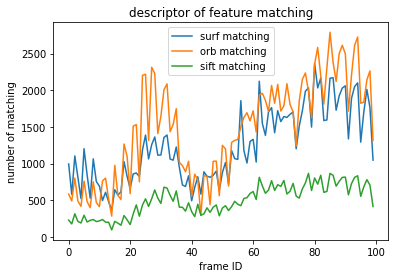

In [20]:
plt.plot(frame_idx,matching_num_surf,label='surf matching')  # SURF feature detector
plt.plot(frame_idx,matching_num_orb,label='orb matching')   #  ORB feature detector
plt.plot(frame_idx,matching_num_sift,label='sift matching') # SIFT feature detector
plt.legend()  # legend
plt.xlabel('frame ID')  # x-axis 
plt.ylabel('number of matching')  # y-axis
plt.title('descriptor of feature matching')  # title
plt.savefig("Brute comparison of feature detector with 3 different descriptor.jpg")


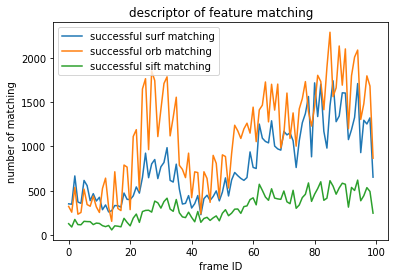

In [22]:
plt.plot(frame_idx,success_surf,label='successful surf matching')  # SURF feature detector
plt.plot(frame_idx,success_orb,label='successful orb matching')   #  ORB feature detector
plt.plot(frame_idx,success_sift,label='successful sift matching') # SIFT feature detector
plt.legend()  # legend
plt.xlabel('frame ID')  # x-axis 
plt.ylabel('number of matching')  # y-axis
plt.title('descriptor of feature matching')  # title
plt.savefig("Brute comparison of successful feature detector with 3 different descriptor.jpg")

In [ ]:
frame_idx,matching_num_surf,matching_num_orb,matching_num_sift,success_surf,success_orb,success_sift,success_surf,success_orb,success_sift=featurematchmetric(FLANN,MIN_MATCH_COUNT=10)   

In [19]:
frame_idx,FLANNmatching_num_orb,FLANNsuccess_orb,FLANNunsuccess_orb=matchmetric(ORB,FLANN,flag="ORB",MIN_MATCH_COUNT=10) 



frame [0]
matches number 419
success [205]
unsuccess [214]
Homo Mat [array([[ 9.97923698e-01,  9.12428359e-03, -3.36639780e+01],
       [-1.19286395e-02,  1.00462589e+00,  1.06572176e+00],
       [-8.75605405e-06,  4.73231623e-06,  1.00000000e+00]])]
frame [0, 1]
matches number 433
success [205, 204]
unsuccess [214, 229]
Homo Mat [array([[ 9.97923698e-01,  9.12428359e-03, -3.36639780e+01],
       [-1.19286395e-02,  1.00462589e+00,  1.06572176e+00],
       [-8.75605405e-06,  4.73231623e-06,  1.00000000e+00]]), array([[ 1.02138480e+00,  1.13736077e-02, -4.68710518e+01],
       [-2.97200219e-05,  1.01665867e+00, -1.35823982e+01],
       [-3.67900298e-07,  5.88189352e-06,  1.00000000e+00]])]
frame [0, 1, 2]
matches number 667
success [205, 204, 465]
unsuccess [214, 229, 202]
Homo Mat [array([[ 9.97923698e-01,  9.12428359e-03, -3.36639780e+01],
       [-1.19286395e-02,  1.00462589e+00,  1.06572176e+00],
       [-8.75605405e-06,  4.73231623e-06,  1.00000000e+00]]), array([[ 1.02138480e+00,  

In [21]:
frame_idx,matching_num_surf,success_surf,unsuccess_surf=matchmetric(SURF,FLANN,flag="SURF",MIN_MATCH_COUNT=10) 

frame [0]
matches number 1182
success [352]
unsuccess [830]
Homo Mat [array([[ 1.05498239e+00, -3.19761407e-04, -7.98874056e+01],
       [ 1.15191674e-02,  1.02087255e+00, -3.02952381e+01],
       [ 8.13717885e-06, -3.78926585e-08,  1.00000000e+00]])]
frame [0, 1]
matches number 801
success [352, 320]
unsuccess [830, 481]
Homo Mat [array([[ 1.05498239e+00, -3.19761407e-04, -7.98874056e+01],
       [ 1.15191674e-02,  1.02087255e+00, -3.02952381e+01],
       [ 8.13717885e-06, -3.78926585e-08,  1.00000000e+00]]), array([[ 1.03764155e+00,  9.74181377e-03, -6.11038995e+01],
       [ 3.28734137e-03,  1.02313078e+00, -1.89650718e+01],
       [ 4.14806422e-06,  4.70324119e-06,  1.00000000e+00]])]
frame [0, 1, 2]
matches number 1435
success [352, 320, 693]
unsuccess [830, 481, 742]
Homo Mat [array([[ 1.05498239e+00, -3.19761407e-04, -7.98874056e+01],
       [ 1.15191674e-02,  1.02087255e+00, -3.02952381e+01],
       [ 8.13717885e-06, -3.78926585e-08,  1.00000000e+00]]), array([[ 1.03764155e+00,

In [23]:
frame_idx,matching_num_sift,success_sift,unsuccess_sift=matchmetric(SIFT,FLANN,flag="SIFT",MIN_MATCH_COUNT=10) 

frame [0]
matches number 271
success [115]
unsuccess [156]
Homo Mat [array([[ 1.01900608e+00, -5.71150310e-03, -4.07400702e+01],
       [-5.06397296e-05,  9.96879139e-01, -1.73191694e+00],
       [ 1.83185130e-07, -2.89467974e-06,  1.00000000e+00]])]
frame [0, 1]
matches number 215
success [115, 94]
unsuccess [156, 121]
Homo Mat [array([[ 1.01900608e+00, -5.71150310e-03, -4.07400702e+01],
       [-5.06397296e-05,  9.96879139e-01, -1.73191694e+00],
       [ 1.83185130e-07, -2.89467974e-06,  1.00000000e+00]]), array([[ 1.01542047e+00, -2.92485085e-03, -3.63180678e+01],
       [-4.97362495e-04,  1.00632081e+00, -1.02292161e+01],
       [-1.10337161e-06, -2.54599204e-07,  1.00000000e+00]])]
frame [0, 1, 2]
matches number 372
success [115, 94, 186]
unsuccess [156, 121, 186]
Homo Mat [array([[ 1.01900608e+00, -5.71150310e-03, -4.07400702e+01],
       [-5.06397296e-05,  9.96879139e-01, -1.73191694e+00],
       [ 1.83185130e-07, -2.89467974e-06,  1.00000000e+00]]), array([[ 1.01542047e+00, -2.

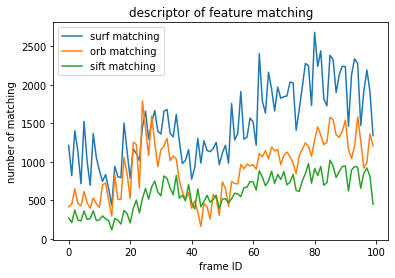

In [41]:

frame_idx,matching_num_surf,matching_num_orb,matching_num_sift,success_surf,success_orb,success_sift,success_surf,success_orb,success_sift   
# print(frame_idx,matching_num_surf,matching_num_orb,matching_num_sift)
# frame_idx=frame_idx[:99]

# matching_num_surf=matching_num_surf[:99]
# matching_num_sift=matching_num_sift[:99]
# matching_num_orb=matching_num_orb[:99]
# print(matching_num_surf[57])

plt.plot(frame_idx,matching_num_surf,label='surf matching')  # SURF feature detector
plt.plot(frame_idx,matching_num_orb,label='orb matching')   #  ORB feature detector
plt.plot(frame_idx,matching_num_sift,label='sift matching') # SIFT feature detector
plt.legend()  # legend
plt.xlabel('frame ID')  # x-axis 
plt.ylabel('number of matching')  # y-axis
plt.title('descriptor of feature matching')  # title
plt.savefig("comparison of feature detector with 3 different descriptor.jpg")


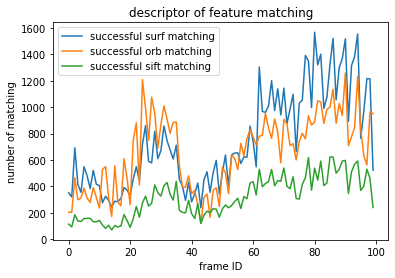

In [26]:
success_surf,success_orb,success_sift

plt.plot(frame_idx,success_surf,label='successful surf matching')  # SURF feature detector
plt.plot(frame_idx,success_orb,label='successful orb matching')   #  ORB feature detector
plt.plot(frame_idx,success_sift,label='successful sift matching') # SIFT feature detector
plt.legend()  # legend
plt.xlabel('frame ID')  # x-axis 
plt.ylabel('number of matching')  # y-axis
plt.title('descriptor of feature matching')  # title
plt.savefig("comparison of successful feature detector with 3 different descriptor.jpg")

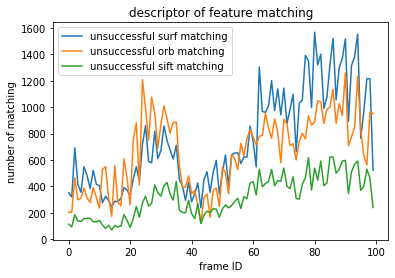

In [24]:
unsuccess_surf,unsuccess_orb,unsuccess_sift   

plt.plot(frame_idx,success_surf,label='unsuccessful surf matching')  # SURF feature detector
plt.plot(frame_idx,success_orb,label='unsuccessful orb matching')   #  ORB feature detector
plt.plot(frame_idx,success_sift,label='unsuccessful sift matching') # SIFT feature detector
plt.legend()  # legend
plt.xlabel('frame ID')  # x-axis 
plt.ylabel('number of matching')  # y-axis
plt.title('descriptor of feature matching')  # title
plt.savefig("comparison of unsuccessful feature detector with 3 different descriptor.jpg")

In [ ]:
unsuccess_surf,unsuccess_orb,unsuccess_sift   

plt.plot(frame_idx,success_surf,label='unsuccessful surf matching')  # SURF feature detector
plt.plot(frame_idx,success_orb,label='unsuccessful orb matching')   #  ORB feature detector
plt.plot(frame_idx,success_sift,label='unsuccessful sift matching') # SIFT feature detector
plt.legend()  # legend
plt.xlabel('frame ID')  # x-axis 
plt.ylabel('number of matching')  # y-axis
plt.title('descriptor of feature matching')  # title
plt.savefig("comparison of unsuccessful feature detector with 3 different descriptor.jpg")

In [21]:
# frame_idx2=[]
# frame_idx_orb2=[]
# matching_num_orb2=[]
# frame_idx_sift2=[]
# matching_num_sift2=[]
# frame_idx_surf2=[]
# matching_num_surf2=[]
frame_idx2,matching_num_surf2,matching_num_orb2,matching_num_sift2=featurematchmetric(FLANN,MIN_MATCH_COUNT=2000)   


good len 1235
good len 425
good len 271
frame [0]
surf 1235
orb 425
sift 271
good len 807
good len 415
good len 209
frame [0, 1]
surf 807
orb 415
sift 209
good len 1426
good len 653
good len 389
frame [0, 1, 2]
surf 1426
orb 653
sift 389
good len 1108
good len 478
good len 252
frame [0, 1, 2, 3]
surf 1108
orb 478
sift 252
good len 705
good len 422
good len 228
frame [0, 1, 2, 3, 4]
surf 705
orb 422
sift 228
good len 1550
good len 597
good len 379
frame [0, 1, 2, 3, 4, 5]
surf 1550
orb 597
sift 379
good len 999
good len 463
good len 265
frame [0, 1, 2, 3, 4, 5, 6]
surf 999
orb 463
sift 265
good len 732
good len 394
good len 282
frame [0, 1, 2, 3, 4, 5, 6, 7]
surf 732
orb 394
sift 282
good len 1381
good len 536
good len 372
frame [0, 1, 2, 3, 4, 5, 6, 7, 8]
surf 1381
orb 536
sift 372
good len 1028
good len 463
good len 235
frame [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
surf 1028
orb 463
sift 235
good len 885
good len 396
good len 238
frame [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
surf 885
orb 396
sift 2

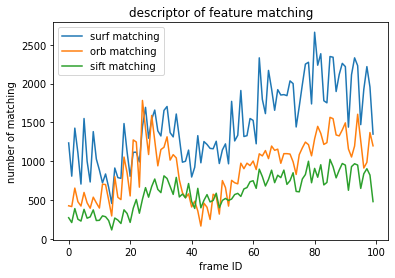

In [23]:
plt.plot(frame_idx2,matching_num_surf2,label='surf matching')  # 画线并添加图例legend
plt.plot(frame_idx2,matching_num_orb2,label='orb matching')   # 画线并添加图例legend
plt.plot(frame_idx2,matching_num_sift2,label='sift matching') 
plt.legend()  # 展示图例legend
plt.xlabel('frame ID')  # 给 x 轴添加坐标轴信息
plt.ylabel('number of matching')  # 给 y 轴添加坐标轴信息
plt.title('descriptor of feature matching')  # 添加图片标题
plt.savefig("FLANN comparison of feature detector with 3 different descriptor.jpg")

Notice that FLANN method contains less matching method, the threshold matching count number can be less than 500.